<h1 style="text-align:center">Markov Chain Monte Carlo with Julia</h1>
<h1 style="text-align:center">Assignment 1</h1>

---

<h3 style="text-align:center">A) <u>Objective: To implement a Discrete Inverse Sampler for Poisson's Distribution.</h3>

In [1]:
# This function samples from [0,1) and returns that value
function sample_from_uniform()
    return rand()
end

# Defining the poisson's distribution pmf:
poisson_pmf(x,λ) = (exp(-λ)*(BigInt(λ)^x))/factorial(BigInt(x))

poisson_pmf (generic function with 1 method)

In [2]:
function sample_from_poisson(λ)
    # Sample a value from the uniform distribution over [0,1]
    # U ~ U(0,1)
    U = rand() # Although this samples from [0,1)


    # Our target is to find an aⱼ such that CDFⱼ₋₁ <= U < CDFⱼ
    # Where CDFⱼ = Σ Pr(aᵢ) where i ∈ [0,j]

    j=0
    cdf = poisson_pmf(j,λ)
    
    # Once the value is less than the CDF, the loop exits and return the value of j
    while U>cdf
        j+=1
        cdf += poisson_pmf(j,λ)
    end
    
    return j
end
    


sample_from_poisson (generic function with 1 method)

In [13]:
# Number of samples to be collected 
N = 1000
# Value of lamda for the poisson's distribution
λ = 30

30

In [14]:
vals = BigInt[]

# Calculating the mean value of the samples
μ = BigInt(0)

for i in 1:N
    aⱼ = sample_from_poisson(λ)
    push!(vals, aⱼ)
    μ += BigInt(aⱼ)
end
μ /= N


# Calculating the variance of the samples
σ² = BigInt(0)

for x in vals
    σ² += (x-μ)^2
end
σ² /= N


println("Value of λ used        = ", λ)
println("Value of μ (mean)      = ", μ)
println("Value of σ² (variance) + ", σ²)

Value of λ used        = 30
Value of μ (mean)      = 30.08400000000000000000000000000000000000000000000000000000000000000000000000005
Value of σ² (variance) + 30.16694400000000000000000000000000000000000000000000000000000000000000000000151


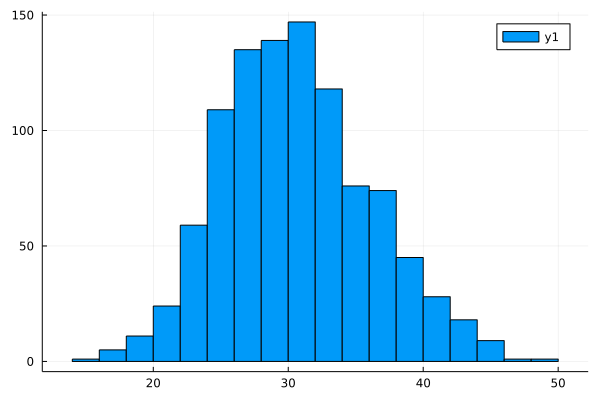

In [15]:
using Plots
p = histogram(vals)
plot(p)

---

<h3 style="text-align:center">B) <u>Objective: To implement a Discrete Accept Reject Sampler to simulate draws from Binomial(n, p) using a Poisson proposal.</h3>

In [84]:
# Defining the target pmf
target_pmf(x,n,p)=binomial(n,x) * p^x * (1-p)^(n-x)

# Defining the proposal distribution. ( Poisson's distribution )
proposal_pmf(x,λ) = (exp(-λ)*(BigInt(λ)^x))/factorial(BigInt(x))

proposal_pmf (generic function with 1 method)

In [85]:
function get_max_c(n,p,λₚ)
    c=-1
    for x in 0:n
        temp = target_pmf(x,n,p)/proposal_pmf(x, λₚ)
        if c<temp
            c=temp
        end
    end
    return c+0.001
end

get_max_c (generic function with 1 method)

In [86]:
function sample_from_binomial_using_ar(n,p,λₚ)

    # n,p are the parameters of the target distribution.
    # λₚ is the paramter for the proposed poisson distribution.
    # 
    
    # Calculating the value of the maximum value for c = pᵢ/qᵢ
    # where pᵢ = target_pmf(aⱼ)  &  qᵢ = proposal_pmf(aⱼ)
    c = get_max_c(n,p,λₚ)
#     println("Value of c is ",c)

    accept = false


    while !accept
        U = rand()
        # Proposed value Y from the proposal distribution
        Y = sample_from_poisson( λₚ )

        q = proposal_pmf(Y, λₚ)
        p = target_pmf(Y, n, p)

        if U < (p/(q*c))
            accept=true
            return Y
        end
    end
end

sample_from_binomial_using_ar (generic function with 2 methods)

In [96]:
# Defining n, p ( Parameters for the Binomial distribution )
n = 15
p = 0.3


# λₚ is the paramter for the proposed poisson distribution.
λₚ = 5

5

In [97]:
# sample_from_binomial_using_ar(n,p)
vals2 = BigInt[]




# Calculating the mean value of the samples
μ2 = BigInt(0)

for i in 1:N
    aⱼ = sample_from_binomial_using_ar(n,p,λₚ)
    push!(vals2, aⱼ)
    μ2 += BigInt(aⱼ)
end
μ2 /= N


# Calculating the variance of the samples
σ²_2 = BigInt(0)

for x in vals2
    σ²_2 += (x-μ2)^2
end
σ²_2 /= N


println("Value of n*p        = ", n*p)
println("Value of μ (mean)      = ", μ2)
println("Value of σ² (variance) = ", σ²_2)

Value of n*p        = 4.5
Value of μ (mean)      = 3.677999999999999999999999999999999999999999999999999999999999999999999999999995
Value of σ² (variance) = 5.126316000000000000000000000000000000000000000000000000000000000000000000003194


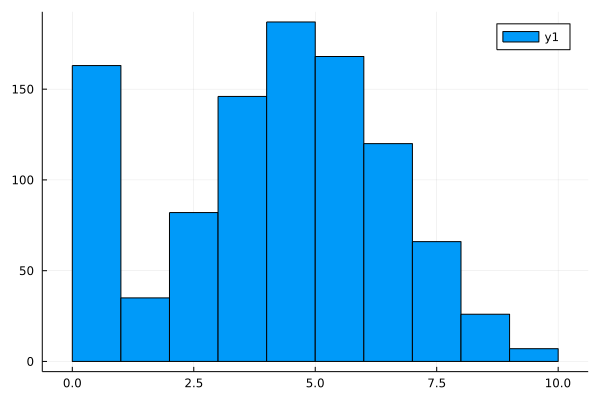

In [98]:
px = histogram(vals2)
plot(px)